# Kenya Cancer Mortality (2010-2019)

##### Global Outlook
Cancer occurs when abnormal cells grow uncontollably anywhere in the body. Cancer tumors spread into and invade ajoining parts, spreading to other organs, this process is referred to as metastasis. Metastasizing is the major cause of death among cancer patients. 
 
**Key Facts**

* Cancer causes more deaths than HIV, TB and malaria combined.
* Globally, cancer is the second leading cause of death, accounting for nearly 1 in 6 deaths.
* Around one-third of deaths from cancer are due to tobacco use, high BMI, alcohol consumption, low fruit and vegetable intake and lack of physical activity. 
* Some cancer-causing infections such as HPV and hepatitis are responsible for approximately 30% of cancer cases in low-and-middle-income countries. 
* Early detection and effective treatment can cure many types of cancers.


##### Kenya Overview
Like the rest of the world, Kenya has been experiencing rising cases of cancer mortality over the years. Cancer is the 3rd highest cause of morbidity. It is estimated that there are 39,000 new cancer cases annually with more than 27,000 deaths (*source:https://kenyacancernetwork.wordpress.com*).

Over 70% of cancer cases are diagnosed in late stages due to a variety of reasons including; lack of awareness, inadequate diagnostic facilities, high cost of treatment and high poverty index. It is quite unfortunate that even the human resource for health in oncology does not match the number of new patients. 



In this EDA, we will explore the 29 different types of cancers categorized into their respective body system for            Kenya from 2010-2019. Our main areas of focus are;
* Annaul mortality trends
* Mortality per cancer type
* Cancer ancer deaths classified into different body systems 
* Reproductive vs digestive sytstem cancers

*data source: The WHO Global Health Observatory*

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
cancer=pd.read_csv('cancer_deaths_by_type_Kenya (2010-19).csv', parse_dates=['Year'])

In [5]:
cancer.shape

(290, 5)

In [6]:
cancer

,Cancer Type,Body System,Male or Female,Year,Total Deaths
0,Liver cancer,Digestive,NaN,2019-01-01,724
1,Kidney cancer,Renal,NaN,2019-01-01,172
2,Lip and oral cavity cancer,Digestive,NaN,2019-01-01,887
3,"Tracheal, bronchus, and lung cancer",Respiratory,NaN,2019-01-01,1282
4,Larynx cancer,Respiratory,NaN,2019-01-01,326
...,...,...,...,...,...
285,Nasopharynx cance,Respiratory,NaN,2010-01-01,359
286,Other pharynx cancer,Respiratory,NaN,2010-01-01,165
287,Colon and rectum cancer,Digestive,NaN,2010-01-01,1115
288,Non-melanoma skin cancer,Skin,NaN,2010-01-01,74


In [7]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Cancer Type     290 non-null    object        
 1   Body System     290 non-null    object        
 2   Male or Female  60 non-null     object        
 3   Year            290 non-null    datetime64[ns]
 4   Total Deaths    290 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 11.5+ KB


In [8]:
cancer['Total Deaths'].sum()

185220

In [9]:
cancer['Total Deaths'].describe()

count     290.000000
mean      638.689655
std       655.802992
min        11.000000
25%       142.250000
50%       387.500000
75%       863.000000
max      2831.000000
Name: Total Deaths, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_20940\521150636.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Year
2010-01-01    15936
2011-01-01    16515
2012-01-01    17031
2013-01-01    17540
2014-01-01    18050
2015-01-01    18575
2016-01-01    19180
2017-01-01    19907
2018-01-01    20798
2019-01-01    21688
Name: Total Deaths, dtype: int64


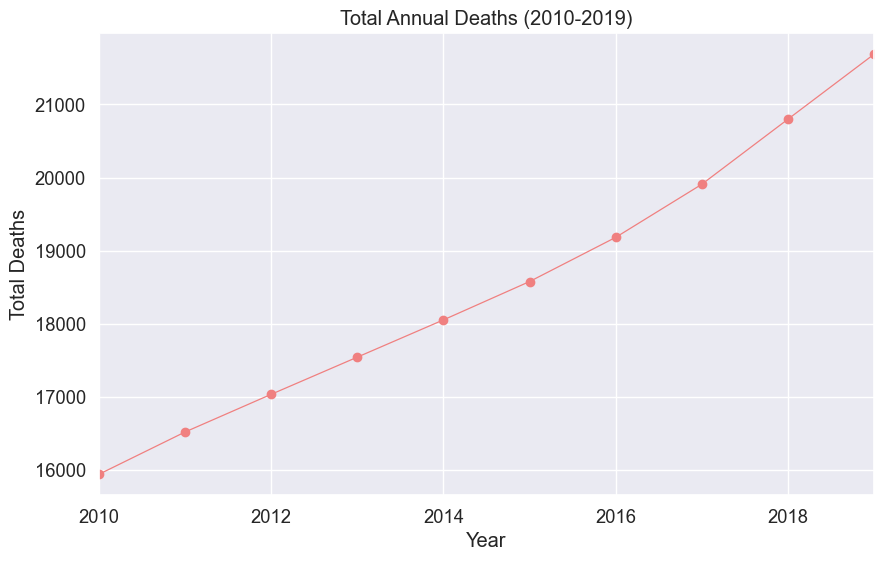

In [34]:
annual_deaths=cancer.groupby('Year').sum()['Total Deaths']
print (annual_deaths)

annual_deaths.plot(kind='line',color=('#F08080'),linestyle='-',marker='o',linewidth=0.9,figsize=(10,6))
#plt.figure(figsize=(10, 6))
#sns.lineplot(cancer=annual_deaths, x='Year', y='Total Deaths', marker='o')

plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Annual Deaths (2010-2019)')
plt.show()

In [14]:
cancer_deaths_by_type=cancer.groupby('Cancer Type').sum()['Total Deaths'].sort_values(ascending=False)
print (cancer_deaths_by_type)

Cancer Type
Esophageal cancer                          24402
Breast cancer                              18885
Stomach cancer                             18247
Prostate cancer                            15484
Cervical cancer                            15312
Colon and rectum cancer                    13425
Tracheal, bronchus, and lung cancer        10706
Non-Hodgkin lymphoma                        7758
Lip and oral cavity cancer                  7610
Leukemia                                    7565
Liver cancer                                6475
Pancreatic cancer                           5422
Brain and central nervous system cancer     4755
Ovarian cancer                              4640
Nasopharynx cance                           4106
Larynx cancer                               2867
Multiple myeloma                            2578
Gallbladder and biliary tract cancer        2502
 Bladder cancer                             2460
Other pharynx cancer                        1926
Hodgkin 

C:\Users\User\AppData\Local\Temp\ipykernel_20940\3323202586.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cancer_deaths_by_type=cancer.groupby('Cancer Type').sum()['Total Deaths'].sort_values(ascending=False)


In [17]:
top5_cancer_types=cancer.groupby('Cancer Type').sum()['Total Deaths'].sort_values(ascending=False).head(5)
print (top5_cancer_types)

Cancer Type
Esophageal cancer    24402
Breast cancer        18885
Stomach cancer       18247
Prostate cancer      15484
Cervical cancer      15312
Name: Total Deaths, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_20940\3920199993.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top5_cancer_types=cancer.groupby('Cancer Type').sum()['Total Deaths'].sort_values(ascending=False).head(5)


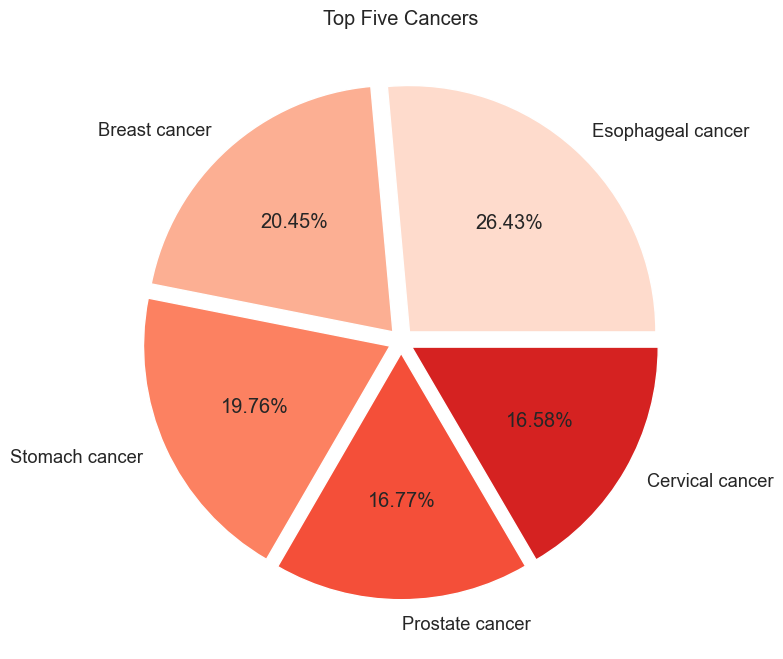

In [18]:
top_5_cancers=['Esophageal cancer','Breast cancer','Stomach cancer','Prostate cancer','Cervical cancer']
Deaths=[24402,18885,18247,15484,15312]
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))
plt.pie(x=Deaths, 
    labels=top_5_cancers,
    autopct='%1.2f%%',
    colors=sns.color_palette('Reds'),
    explode=[0.05, 0.05, 0.05, 0.05, 0.05])
plt.title('Top Five Cancers')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20940\4206357276.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cancer_deaths_by_body_system=cancer.groupby('Body System').sum()['Total Deaths'].sort_values(ascending=False)


Body System
Digestive       78083
Reproductive    55752
Circulatory     19999
Respiratory     19605
Neuronal         4755
Renal            3872
Skin             2062
Endocrine         621
Other             471
Name: Total Deaths, dtype: int64


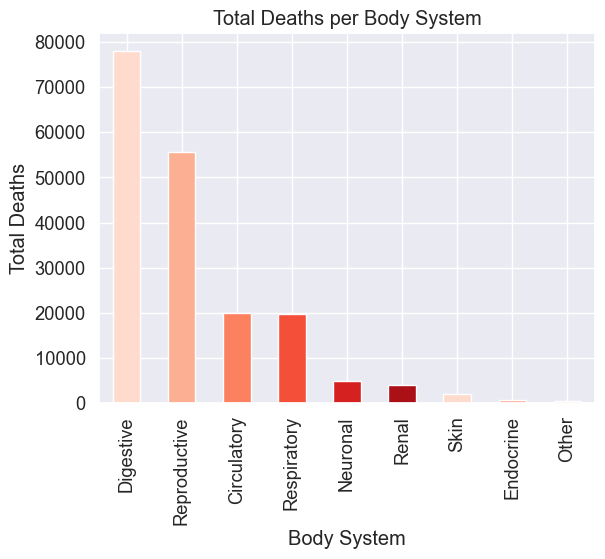

In [21]:
cancer_deaths_by_body_system=cancer.groupby('Body System').sum()['Total Deaths'].sort_values(ascending=False)
print (cancer_deaths_by_body_system)

cancer_deaths_by_body_system.plot(kind='bar',color=sns.color_palette('Reds'))
plt.xlabel('Body System')
plt.ylabel('Total Deaths')
plt.title('Total Deaths per Body System')
plt.show()

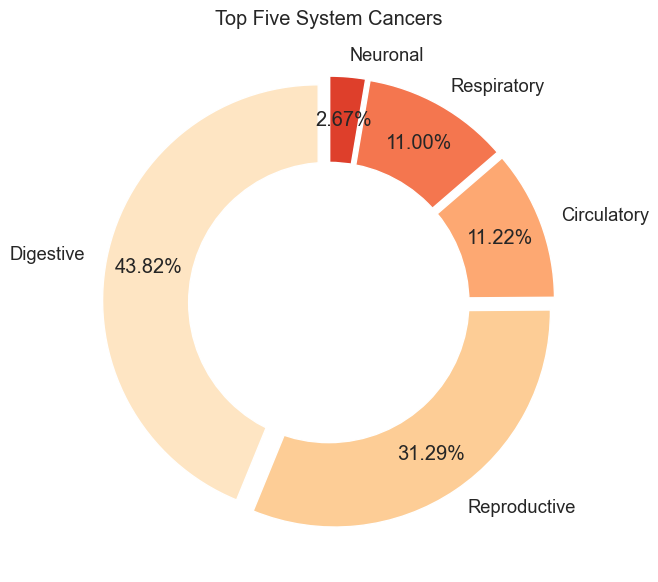

In [27]:
Top_5_System_Cancers=['Digestive','Reproductive','Circulatory','Respiratory','Neuronal']
Deaths=[78083,55752,19999,19605,4755]
sns.set(font_scale = 1.2)
plt.figure(figsize=(7,7))
plt.pie(
    x=Deaths, 
    labels=Top_5_System_Cancers,
    colors=sns.color_palette('OrRd'),
    startangle=90,
    #percentages
    autopct='%1.2f%%',
    pctdistance=0.80,
    explode=[0.05, 0.05, 0.05, 0.05, 0.05]
)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Top Five System Cancers')
plt.show()

In [25]:
#fig=px.sunburst(cancer,path=['Body System','Cancer Type'],values='Total Deaths')
#fig.show()

fig = px.sunburst(cancer, path=['Body System', 'Cancer Type'], values='Total Deaths', color='Body System', 
                  color_discrete_map={
        'Digestive': '#F08080',
        'Reproductive': '#FF82AB',
        'Circulatory': '#FFC0CB',            
        'Respiratory': '#EEA9B8',            
        'Neuronal': '#FFC1C1' ,          
        'Renal': '#FF82AB',           
        'Skin': '#FFB5C5', 
        'Endocrine': '#FFBBFF',             
        'Other':'#FFDAB9'})
fig.update_layout(title_text='Cancer Deaths by Type Cassified into Specific System (2010-2019)', title_x=0)
plt.figure(figsize=(8,8))
fig.show()

<Figure size 800x800 with 0 Axes>

In [30]:
reproductive_vs_digestive=pd.DataFrame([['Reproductive','Breast cancer',18885],['Reproductive','Cervical cancer',15312],['Reproductive','Prostate cancer',15484],['Reproductive','Uterine cancer',1313],['Reproductive','Testicular cancer',118],['Reproductive','Ovarian cancer',4640],
                                       ['Digestive','Esophageal cancer',24402],['Digestive','Stomach cancer',18247],['Digestive','Colon and rectum cancer',13425],['Digestive','Lip and oral cavity cancer',7610],['Digestive','Liver cancer',6475],['Digestive','Pancreatic cancer',5422],['Digestive','Gallbladder and biliary tract cancer',2502]],
                columns=['Body System','Cancer Type','Total Deaths'])
print (reproductive_vs_digestive)


fig=px.sunburst(reproductive_vs_digestive,path=['Body System','Cancer Type'],values='Total Deaths',color='Body System',
                color_discrete_map={'Digestive': '#F08080','Reproductive': '#FFB6C1'})
fig.update_layout(title_text='Digestive vs Reproductive System Cancers', title_x=0)
fig.show()

     Body System                           Cancer Type  Total Deaths
0   Reproductive                         Breast cancer         18885
1   Reproductive                       Cervical cancer         15312
2   Reproductive                       Prostate cancer         15484
3   Reproductive                        Uterine cancer          1313
4   Reproductive                     Testicular cancer           118
5   Reproductive                        Ovarian cancer          4640
6      Digestive                     Esophageal cancer         24402
7      Digestive                        Stomach cancer         18247
8      Digestive               Colon and rectum cancer         13425
9      Digestive            Lip and oral cavity cancer          7610
10     Digestive                          Liver cancer          6475
11     Digestive                     Pancreatic cancer          5422
12     Digestive  Gallbladder and biliary tract cancer          2502


## Summary of Findings

### Annual Mortality Trends
Cancer mortality rates have been rising over the years, and is expected to keep on rising.

    2010    15,936
    2011    16,515
    2012    17,031
    2013    17,540
    2014    18,050
    2015    18,575
    2016    19,180
    2017    19,907
    2018    20,798
    2019    21,688
    Total  185,220

### Cancer Deaths by Type

Unlike global statistics that show tracheal, bronchus and lung cancer as the top killing cancer, esophageal cancer is the leading cancer type in Kenya. The top 5 killing cancers are esophageal, breast, stomach, prostate and cervical cancer. 

Esophageal cancer has contributed to over 13% of total cancer deaths over the decade under review. Followed closely by breast and stomach cancer with a little over 10 and 9 per cent respectively. Testicular cancer has the lowest mortality at 0.0006%.
    
    Top 5 Cancers
                
    Esophageal cancer    24,402
    Breast cancer        18,885
    Stomach cancer       18,247
    Prostate cancer      15,484
    Cervical cancer      15,312


### System Cancers
There are 11 boody systems- integumentary system (skin), skeletal, muscular, nervous, endocrine, cardiovascular, lymphatic, respiratory, digestive, urinary and reproductive systems. 

As expected,cancers of the digestive system i.e. esophageal, lip and oral, colorectum, stomach, liver, gallbladder and pancreatic cancers are the top killing cancers. However, heavy focus has been poured into reproductive system cancers, specifically breast, cervical and prostate cancer. 

#### Reproductive System Cancers 
Reproductive cancers can easily be categorized into male and female with the exception of breast cancer which affects both genders, which is the leading cause of death among cancers of the reproductive system. 

It is quite interesting to note that prostate cancer claims more lives than cervical cancer. Men tend to shy away from cancer screening as compared to women, so the probabilty of the prostate cancer figure being on the lower end is something worth noting. We lose more men to prostate cancer than we do women to cervical cancer. Prostate cancer accounts for over 99% total male deaths, which is 42% in the exclusively male and female cancer category.  

### Recommendations 
*  Shift focus and intensify campaigns on digestive system cancers
*  Create awareness on cancer screening for early detection and treatment
*  Educate the public on the benefits and availability of the HPV vaccine
*  Adopting an active and healthy lifestyle e.g avoiding alcohol and tobaco, excercising, eating healthy and well-balanced foods
*  Reduce exposure to UV rays
*  Avoid urban air polution
*  Establishing more cancer facilities across the country

